In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

df = pd.read_csv('Iris.csv')

df = df.drop('Id', axis=1)

print(df.info())
print(df.head())
print(df['Species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype:

In [ ]:
# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

Accuracy: 1.0


In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


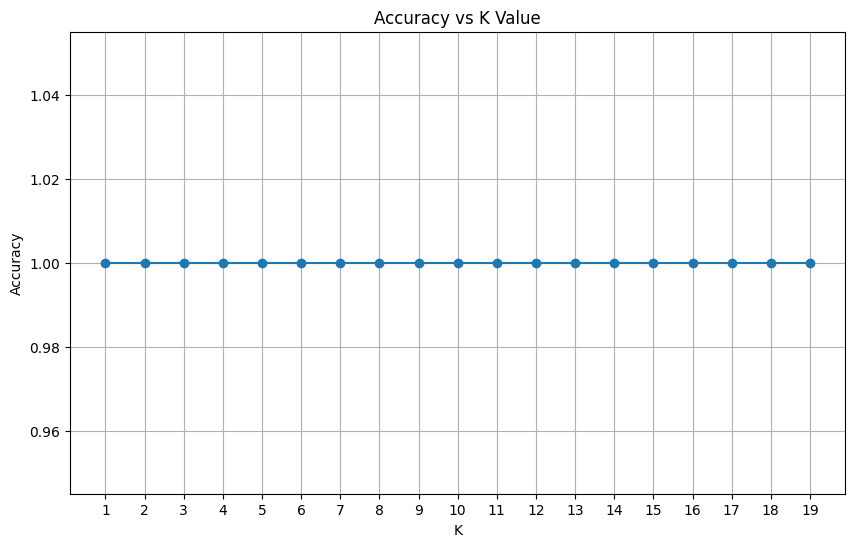

In [8]:
# Test different k values
k_values = range(1, 20)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


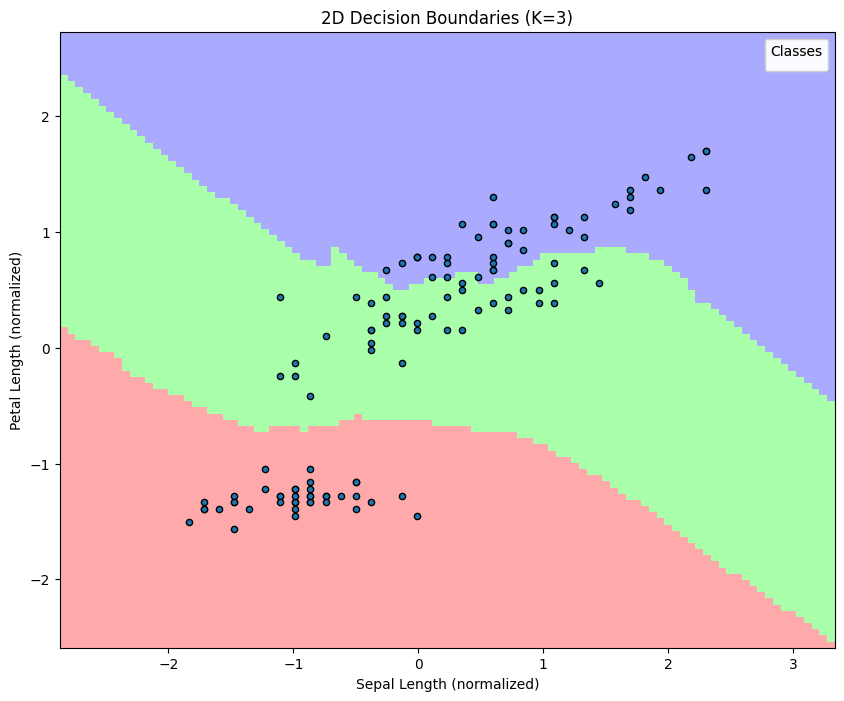

In [14]:
# We'll use sepal length and petal length for visualization
X_vis = df.iloc[:, [0, 2]].values
y_vis = df.iloc[:, -1].values

# Split and scale
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42)

scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

# Train KNN on these two features
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision boundary
_, ax = plt.subplots(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    knn_vis,
    X_train_vis,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel='Sepal Length (normalized)',
    ylabel='Petal Length (normalized)',
    shading='auto')

# Plot training points
scatter = ax.scatter(
    X_train_vis[:, 0], X_train_vis[:, 1], edgecolor='k', s=20)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
plt.title("2D Decision Boundaries (K=3)")
plt.show()

In [13]:
# Let's choose k=5 based on the plot (typically a good balance)
final_knn = KNeighborsClassifier(n_neighbors=5)
final_knn.fit(X_train, y_train)

# Final evaluation
y_pred_final = final_knn.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_cm = confusion_matrix(y_test, y_pred_final)

print(f"Final Model Accuracy (k=5): {final_accuracy:.2f}")
print("Final Confusion Matrix:")
print(final_cm)

Final Model Accuracy (k=5): 1.00
Final Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
